# Weekly Rate of Return, Sharpe, Jensen, Betas, and Mean Variance Weights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from tabulate import tabulate
import math
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf

In [3]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

one_yr_ago = datetime.now() - relativedelta(years=1)
one_yr_ago = one_yr_ago.strftime("%Y-%m-%d")

start = one_yr_ago 
end = datetime.now().strftime("%Y-%m-%d")
symbols = ['FDS','INVH', 'ROL', 'RBLX', 'HIG']

In [10]:
all_df = yf.download(symbols, start, end)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [20]:
df = all_df[['FDS','INVH', 'ROL', 'RBLX', 'HIG']]

In [21]:
df = df.reset_index() 

In [26]:
df

,Date,FDS,INVH,ROL,RBLX,HIG
0,2022-07-19,396.236359,34.667015,35.985909,39.849998,62.020275
1,2022-07-20,397.594574,34.705891,35.985909,40.759998,61.834644
2,2022-07-21,407.518555,35.201550,36.104412,41.919998,61.609936
3,2022-07-22,404.524506,35.425083,36.015537,39.400002,62.313377
4,2022-07-25,402.740021,35.434799,36.035290,39.840000,63.300156
...,...,...,...,...,...,...
246,2023-07-12,399.519989,35.299999,43.919998,43.459999,72.599998
247,2023-07-13,413.839996,35.500000,44.029999,44.299999,72.489998
248,2023-07-14,410.730011,35.400002,44.540001,43.000000,70.500000
249,2023-07-17,420.100006,35.330002,44.590000,44.459999,72.220001


# Weekly returns (I assumed rolling average)

In [29]:
weekly_returns = df[['FDS','INVH', 'ROL', 'RBLX', 'HIG']].pct_change(periods=5) # go by business days 

In [61]:
weekly_returns =weekly_returns.dropna()

In [62]:
weekly_returns

,FDS,INVH,ROL,RBLX,HIG
5,0.013936,0.026353,-0.006037,-0.021330,0.013863
6,0.019375,0.035284,-0.029638,0.029195,0.016590
7,0.024571,0.066262,0.054978,0.025286,-0.003330
8,0.053060,0.070782,0.057581,0.089594,0.010818
9,0.040790,0.056226,0.071526,0.135542,-0.020991
...,...,...,...,...,...
246,0.010292,0.018465,0.020920,0.041707,0.007773
247,0.057873,0.021583,0.012649,0.108054,0.001243
248,0.059757,0.018998,0.031974,0.044957,-0.030661
249,0.062388,0.016691,0.030268,0.067980,-0.003862


In [31]:
weekly_returns['FDS'].mean()

0.0012799737009635836

In [33]:
weekly_returns['INVH'].mean()

0.0007764826005830564

In [34]:
weekly_returns['ROL'].mean()

0.004833048197696915

# Standard Deviation and Sharpe Ratio

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fmin
import math


In [57]:
def std_dev_portfolio(weekly_returns, W):
    return np.dot(W,  np.array(np.std(weekly_returns, axis=0)))

In [58]:

def sharpe_ratio(weekly_returns, W,risk_free_rate=0.0):
    # Calculate weekly Sharpe Ratio
    weekly_sharpe_ratio = (np.dot(W,  np.array(np.mean(weekly_returns, axis=0))) - risk_free_rate) 
    weekly_sharpe_ratio = weekly_sharpe_ratio/np.dot(W,  np.array(np.std(weekly_returns, axis=0)))
    sharpe_ratio = weekly_sharpe_ratio 
    return sharpe_ratio

In [59]:
  np.array(np.mean(weekly_returns, axis=0))

array([0.00127997, 0.00077648, 0.00483305, 0.00618768, 0.00348119])

# Sharpe Ratio

In [60]:
print('Symbols: ', symbols)

equal_weighted = [1/len(symbols) for i in range(len(symbols))]
print("with weights: ", equal_weighted)
stocks_df = all_df 
print('Portfio Sharpe ratio: ',round(sharpe_ratio(weekly_returns, equal_weighted), 4))

print('Standard deviation: ',round(std_dev_portfolio(weekly_returns, equal_weighted), 4))

Symbols:  ['FDS', 'INVH', 'ROL', 'RBLX', 'HIG']
with weights:  [0.2, 0.2, 0.2, 0.2, 0.2]
Sharpe ratio:  0.0712
Standard deviation:  0.0465


# Efficient Portfolio (Mean-Variance) 

In [ ]:
import numpy as np, numpy.random

In [79]:
np.random.seed(1885451678)

array([[0.12236059, 0.31912563, 0.02049388, 0.42163719, 0.11638272]])

In [113]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize




def portfolio_risk(W, returns):
    portfolio_return = np.sum(returns.mean() * W) 
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), W)))
    return portfolio_std_dev


num_assets =  len(symbols)
# for fun: weights = np.random.dirichlet(np.ones(num_assets),size=1)[0]
weights = np.array(num_assets * [1. / num_assets,])

print("random weights: ", weights)
bounds = tuple((0, 1) for asset in range(num_assets))

constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

minimized_risk = minimize(portfolio_risk, weights, args=(df[['FDS', 'INVH', 'ROL', 'RBLX', 'HIG']].pct_change()), method='SLSQP', bounds=bounds, constraints=constraints)

print(minimized_risk.x)

random weights:  [0.2 0.2 0.2 0.2 0.2]
[2.56739074e-16 0.00000000e+00 4.80011798e-01 2.44596010e-16
 5.19988202e-01]


In [114]:
opt_weights = [float(i) for i in minimized_risk.x]

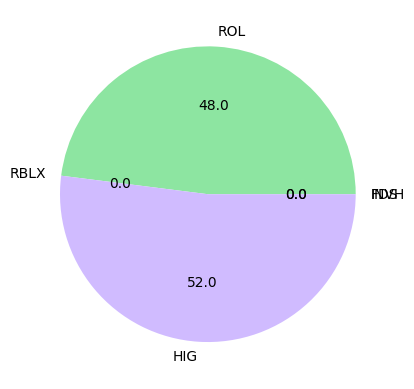

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = opt_weights
labels = symbols

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f')
plt.show()

# Beta Calculation

In [134]:
def get_return_portfolio(W,stocks):
    df = stocks.pct_change()
    return np.sum(df[1:] * W,axis=1)

In [143]:
m= yf.download('SPY', start, end)
m= m[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [153]:
stock = get_return_portfolio(np.array(opt_weights),df[['FDS', 'INVH', 'ROL', 'RBLX', 'HIG']])
market = m.pct_change()[1:]

In [164]:
beta_df =pd.DataFrame({'Stock':stock.values, 'Market':market["Adj Close"].values})

In [165]:
# for the portfolio 
beta  = (beta_df[['Stock','Market']].cov()/beta_df['Market'].var()).iloc[0].iloc[1]
print('Beta for the portfolio: ', beta.round(4))

Beta for the portfolio:  0.6217


## Individual Betas

In [178]:
def beta(stocks_return, market_return):
    beta_df =pd.DataFrame({'Stock':stocks_return.values, 'Market':market_return.values})
    cov_m = beta_df[['Stock','Market']].cov()
    beta =  cov_m / np.std(market_return)
    return beta.iloc[0].iloc[1]

In [179]:
market_symbol ='SPY'
market = yf.download(market_symbol, start=start, end=end)['Adj Close']
FDSstock = yf.download('FDS', start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [182]:
market_return = market.pct_change().dropna()
FDSstock_return = FDSstock.pct_change().dropna()
print("FDS Return: ", beta(FDSstock_return, market_return))

FDS Return:  0.010502249000735332


In [183]:
symbols

['FDS', 'INVH', 'ROL', 'RBLX', 'HIG']

In [184]:
INVHstock = yf.download('INVH', start=start, end=end)['Adj Close']
market_return = market.pct_change().dropna()
INVHstock_return = INVHstock.pct_change().dropna()
print("INVH Return: ", beta(INVHstock_return, market_return))

[*********************100%***********************]  1 of 1 completed
INVH Return:  0.011389078402327332


In [185]:
ROLstock = yf.download('ROL', start=start, end=end)['Adj Close']
market_return = market.pct_change().dropna()
ROLstock_return = ROLstock.pct_change().dropna()
print("ROL Return: ", beta(ROLstock_return, market_return))

[*********************100%***********************]  1 of 1 completed
ROL Return:  0.005591673507375275


In [186]:
RBLXstock = yf.download('RBLX', start=start, end=end)['Adj Close']
market_return = market.pct_change().dropna()
RBLXstock_return = RBLXstock.pct_change().dropna()
print("RBLX Return: ", beta(RBLXstock_return, market_return))

[*********************100%***********************]  1 of 1 completed
RBLX Return:  0.023864451277153247


In [187]:
HIGstock = yf.download('HIG', start=start, end=end)['Adj Close']
market_return = market.pct_change().dropna()
HIGstock_return = HIGstock.pct_change().dropna()
print("HIG Return: ", beta(HIGstock_return, market_return))

[*********************100%***********************]  1 of 1 completed
HIG Return:  0.00922204720339693


# Jensen's Index
 # TODO PLS CHECK

In [248]:
def jensen_indx(tot_return, market_return, beta, risk_free_rate=0.0):
    return (tot_return - beta * (market_return-risk_free_rate))/100

In [235]:
m= yf.download('SPY', start, end)
m= m[['Adj Close']]
market_return =m.iloc[-1]-m.iloc[0]
market_return = market_return["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [250]:
tot_return = sum(df[['FDS', 'INVH', 'ROL', 'RBLX', 'HIG']].iloc[-1].values* opt_weights) - sum(df[['FDS', 'INVH', 'ROL', 'RBLX', 'HIG']].iloc[0].values* opt_weights)

In [251]:
beta = 0.6217 # from previous section

jensen_indx(tot_return, market_return, beta)

-0.32814725013991786